In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
%matplotlib inline

In [2]:
def Gaussian(data):
    mu, std = norm.fit(data)
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin,xmax, 100)
    p = norm.pdf(x, mu, std)
    return p

In [3]:
df_Dirac_G_O = pd.read_csv(r'Channel/Dirac_G_O_Channel.txt', sep = '\t', header = None)
df_Dirac_P_O = pd.read_csv(r'Channel/Dirac_P_O_Channel.txt', sep = '\t', header = None)

In [4]:
df_Dirac_G_O.rename(columns = lambda s:s+1, index = lambda s: s+1)
#The rows and columns represent the steps (billiards setups of chaotic ensemble) and the open channels, respectively.

,1,2,3,4,5,6,7,8,9,10
1,0.031346,1.30440,3.16437,3.18706,4.73045,6.15759,6.00609,7.67625,9.26540,8.89731
2,0.917941,1.57961,2.27855,3.49147,4.47150,6.18405,7.20179,7.61064,8.58038,9.23560
3,0.638276,1.46562,1.89329,4.03201,4.28713,5.62536,6.39453,7.18086,8.84516,9.74711
4,0.137736,1.18902,2.91101,4.03208,4.34502,5.00938,6.02277,8.19029,8.57533,9.85360
5,0.928187,1.55232,3.13718,3.77083,4.38930,5.47503,6.95621,7.77886,9.17784,9.02395
...,...,...,...,...,...,...,...,...,...,...
99996,0.798615,2.38114,3.79409,3.45924,4.52763,5.72013,7.20167,7.54310,8.26511,10.04130
99997,0.224436,1.06311,2.61732,3.01560,5.90547,5.51645,7.21933,6.77884,8.41843,8.61758
99998,0.006396,2.16033,2.80473,2.66590,4.50464,5.05149,6.80262,8.19594,8.41337,9.69919
99999,0.451685,1.30753,2.79076,3.13370,4.63370,5.37172,6.36448,7.13061,8.46168,9.04596


In [5]:
G_O = df_Dirac_G_O.values
P_O = df_Dirac_P_O.values

No handles with labels found to put in legend.
No handles with labels found to put in legend.


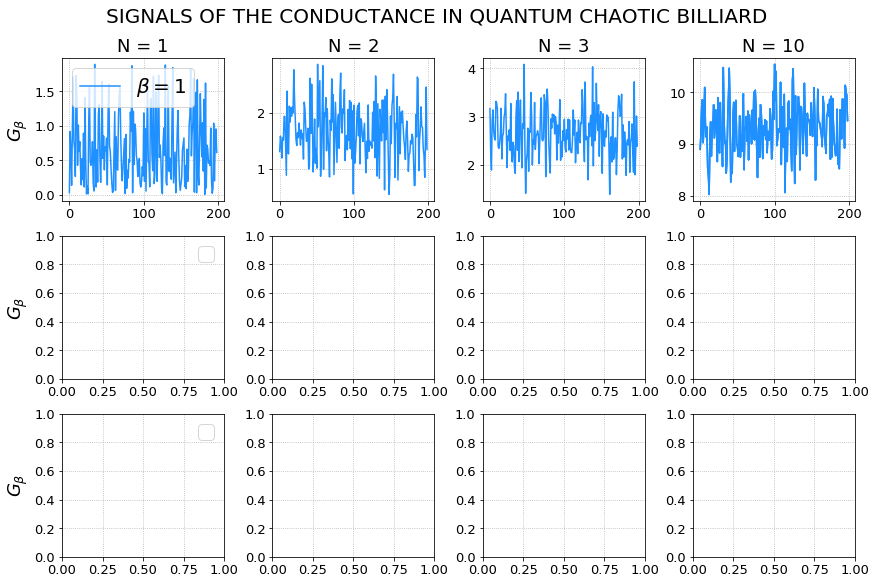

In [6]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'SIGNALS OF THE CONDUCTANCE IN QUANTUM CHAOTIC BILLIARD', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].plot(G_O[0:199,9], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            #axs[1,3].plot(G_U[0:199,9], color='red', label = r'$\beta = 2$', alpha=1);
            #axs[2,3].plot(G_S[0:199,9], color='lime', label = r'$\beta = 4$', alpha=1);
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].plot(G_O[0:199,j], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            #else:
            #    if (i == 1):
                    #axs[i,j].plot(G_U[0:199,j], color='red', label = r'$\beta = 2$', alpha=1);
            #    else:
            #        if (i == 2):
                        #axs[i,j].plot(G_S[0:199,j], color='lime', label = r'$\beta = 4$', alpha=1);
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$G_{\beta}$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
            
        axs[i,j].grid(linestyle=':')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


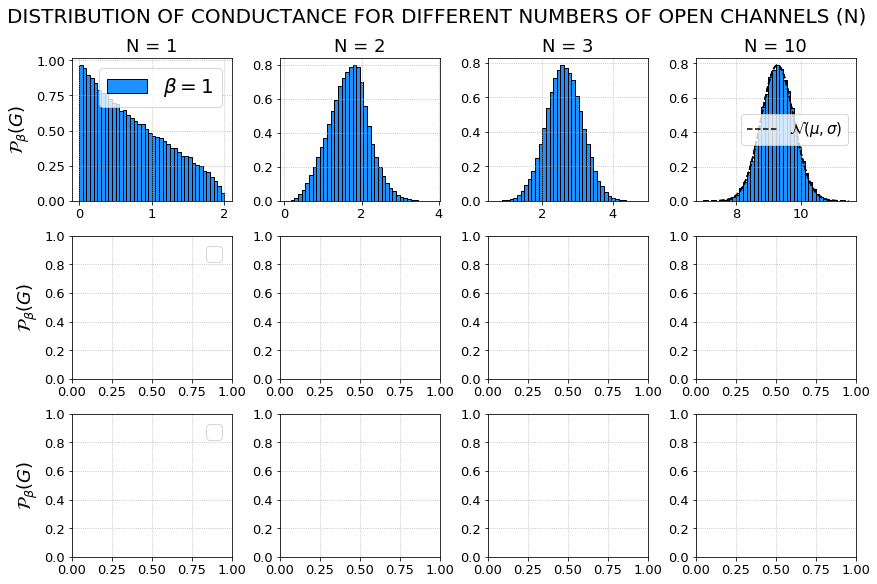

In [7]:
steps = 50

fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(G_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            #axs[1,3].hist(G_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            #axs[2,3].hist(G_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(G_O[:,9]), np.max(G_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(G_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            #x = np.linspace(np.min(G_U[:,9]), np.max(G_U[:,9]), 100)
            #axs[1,3].plot(x,Gaussian(G_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            #x = np.linspace(np.min(G_S[:,9]), np.max(G_S[:,9]), 100)
            #axs[2,3].plot(x,Gaussian(G_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(G_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            #else:
                #if (i == 1):
                    #axs[i,j].hist(G_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                #else:
                    #if (i == 2):
                        #axs[i,j].hist(G_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(G)$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15)
        
        axs[i,j].grid(linestyle=':')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


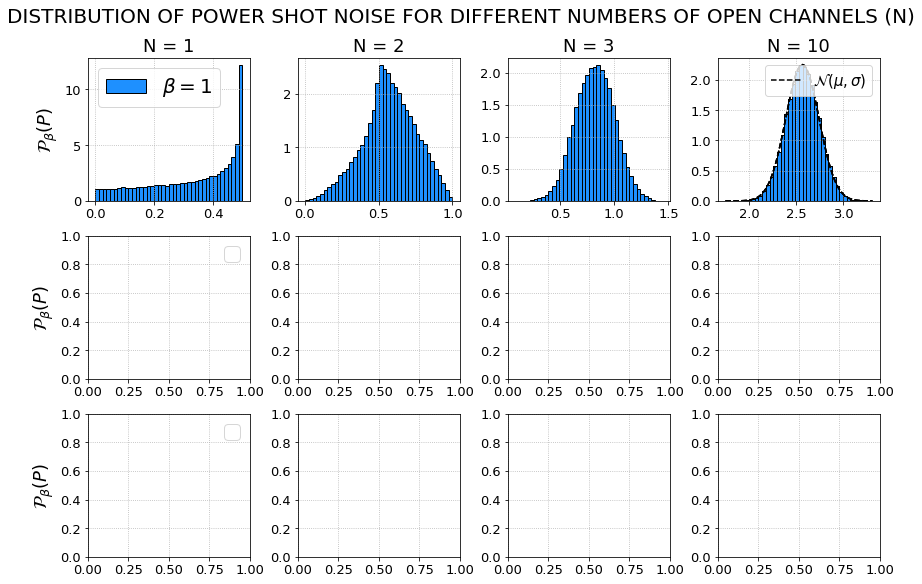

In [8]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(P_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            #axs[1,3].hist(P_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            #axs[2,3].hist(P_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            
            x = np.linspace(np.min(P_O[:,9]), np.max(P_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(P_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            #x = np.linspace(np.min(P_U[:,9]), np.max(P_U[:,9]), 100)
            #axs[1,3].plot(x,Gaussian(P_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            #x = np.linspace(np.min(P_S[:,9]), np.max(P_S[:,9]), 100)
            #axs[2,3].plot(x,Gaussian(P_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(P_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            #else:
                #if (i == 1):
                    #axs[i,j].hist(P_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                #else:
                    #if (i == 2):
                        #axs[i,j].hist(P_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(P)$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
            
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = "upper right")
        
        axs[i,j].grid(linestyle=':')